##  Classification


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
# functions for metrics
import pandas as pd
import numpy as np
import tensorflow as tf
import plotly
from plotly.express import scatter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Task 1 - Load the data in a csv file into a dataframe


In [14]:
# the data set is available at the url below.
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/diabetes.csv"


df = pd.read_csv(URL)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


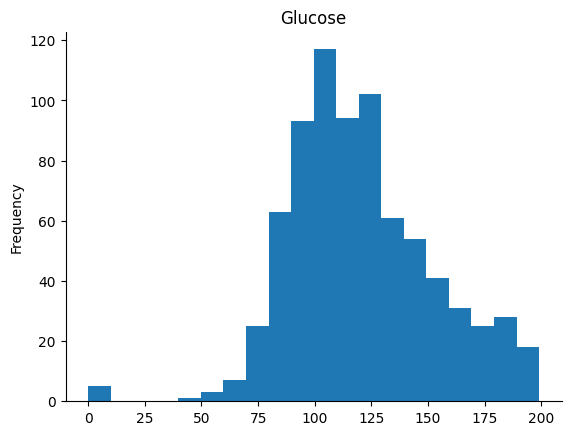

In [15]:
from matplotlib import pyplot as plt
df['Glucose'].plot(kind='hist', bins=20, title='Glucose')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
df.shape

(768, 9)

In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: >

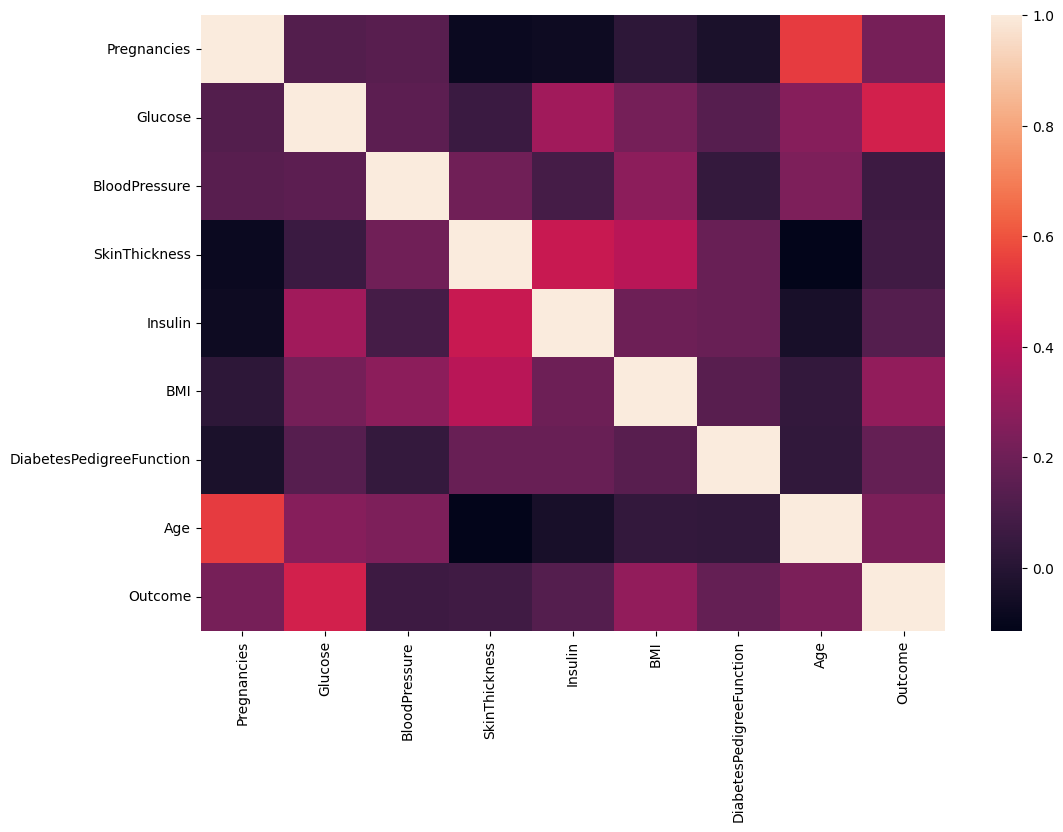

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
sns.heatmap(data = df.corr())

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Let's plot the types and count of Outcome


In [21]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: >

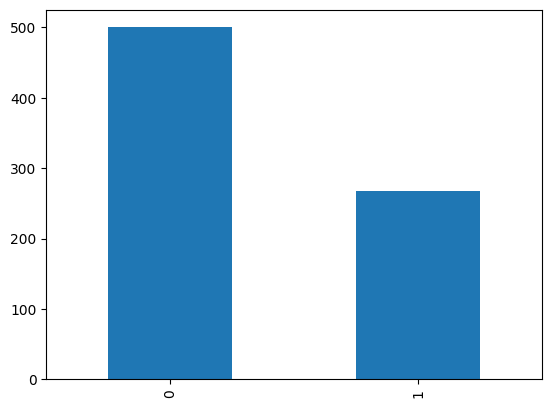

In [22]:
df.Outcome.value_counts().plot.bar()

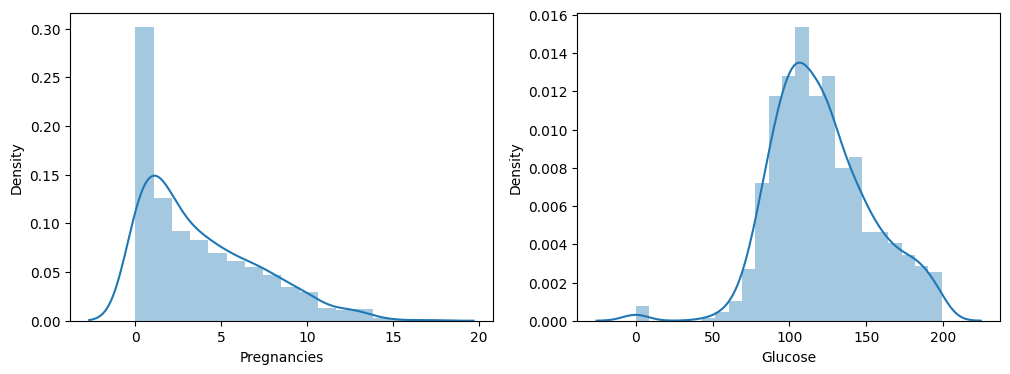

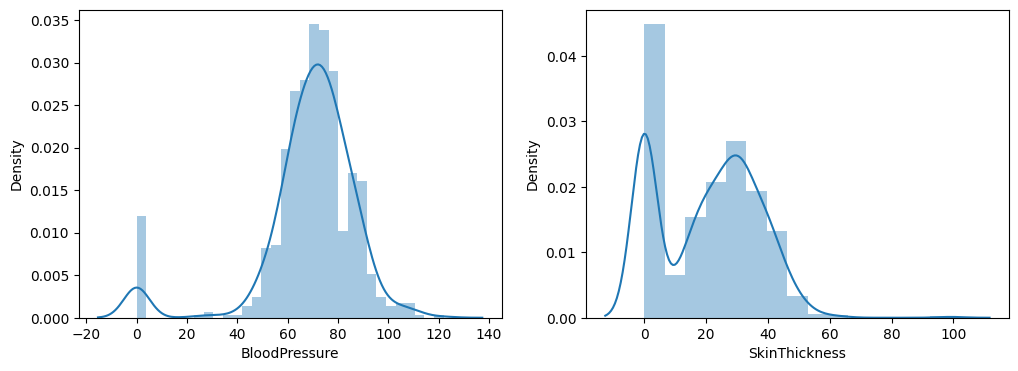

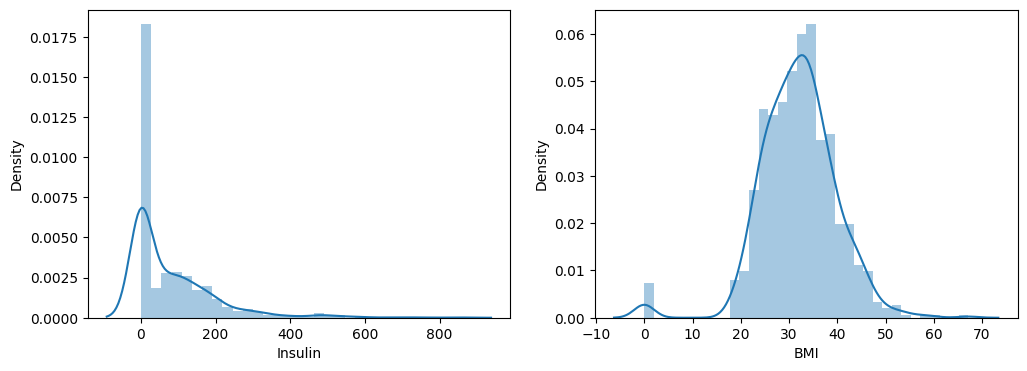

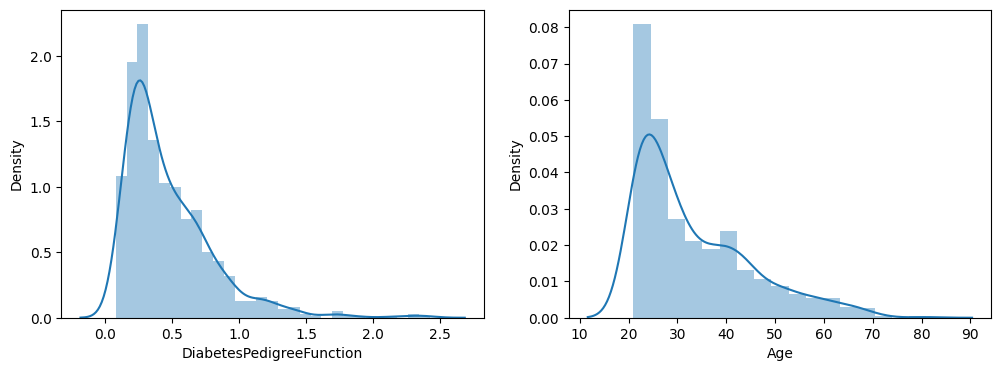

In [23]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['Pregnancies'])
plt.subplot(1,2,2)
sns.distplot(df['Glucose'])
plt.show()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['BloodPressure'])
plt.subplot(1,2,2)
sns.distplot(df['SkinThickness'])
plt.show()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['Insulin'])
plt.subplot(1,2,2)
sns.distplot(df['BMI'])
plt.show()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['DiabetesPedigreeFunction'])
plt.subplot(1,2,2)
sns.distplot(df['Age'])
plt.show()

There are 500 people without diabetes and 268 people with diabetes in this dataset.


## Task 2 - Identify the target column and the data columns


First we identify the target. Target is the value that our machine learning model needs to classify


In [24]:
#X = df.iloc[:,:-1]
#y = df.iloc[:, -1]

y = df["Outcome"]

We identify the features next. Features are the input values our machine learning model learns from


In [25]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

## Task 3 - Split the data set


We split the data set in the ratio of 70:30. 70% training data, 30% testing data.


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

## Task 4 - Build and train a classifier


Create a Logistic Regression model


In [27]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print('Linear Regression Train Score is : ' , classifier.score(X_train, y_train))
print('Linear Regression Test Score is : ' , classifier.score(X_test, y_test))
print('Linear Regression Coef is : ' , classifier.coef_)
print('Linear Regression intercept is : ' , classifier.intercept_)
print('----------------------------------------------------')

y_pred = classifier.predict(X_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10])

Linear Regression Train Score is :  0.776536312849162
Linear Regression Test Score is :  0.7316017316017316
Linear Regression Coef is :  [[ 0.18479202  0.02967993 -0.01715367  0.01540681 -0.00223223  0.04933594
   1.57992254  0.0084843 ]]
Linear Regression intercept is :  [-6.70216588]
----------------------------------------------------
Predicted Value for Linear Regression is :  [1 0 1 0 0 0 1 1 0 0]


In [28]:
RClassifier = RandomForestClassifier(n_estimators=100,max_depth=2, random_state=33)
RClassifier.fit(X_train, y_train)

print('Random Forest Regressor Train Score is : ' , RClassifier.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RClassifier.score(X_test, y_test))
print('----------------------------------------------------')

y_pred = RClassifier.predict(X_test)
print('Predicted Value for Random Forest Classifier is : ' , y_pred[:10])

Random Forest Regressor Train Score is :  0.7653631284916201
Random Forest Regressor Test Score is :  0.7186147186147186
----------------------------------------------------
Predicted Value for Random Forest Classifier is :  [1 0 1 0 0 0 1 1 0 0]


In [29]:
df[:10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1



#----------------------------------------------------
#Applying VotingClassifier Model


In [30]:

from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC


'''
#ensemble.VotingClassifier(estimators, voting=’hard’, weights=None,n_jobs=None, flatten_transform=None)
'''

#loading models for Voting Classifier
SVCModel_ = SVC(kernel = 'rbf', random_state = 33,C = 0.9,degree = 5)

#loading Voting Classifier
VotingClassifierModel = VotingClassifier(estimators=[('SVCModel',SVCModel_)], voting='hard')
VotingClassifierModel.fit(X_train, y_train)

#Calculating Details
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModel.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = VotingClassifierModel.predict(X_test)
print('Predicted Value for VotingClassifierModel is : ' , y_pred[10:22])

VotingClassifierModel Train Score is :  0.7672253258845437
VotingClassifierModel Test Score is :  0.7662337662337663
----------------------------------------------------
Predicted Value for VotingClassifierModel is :  [0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
df[10:22]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1
12,10,139,80,0,0,27.1,1.441,57,0
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
15,7,100,0,0,0,30.0,0.484,32,1
16,0,118,84,47,230,45.8,0.551,31,1
17,7,107,74,0,0,29.6,0.254,31,1
18,1,103,30,38,83,43.3,0.183,33,0
19,1,115,70,30,96,34.6,0.529,32,1




#----------------------------------------------------
#Applying BernoulliNB Model


In [32]:

'''
sklearn.naive_bayes.BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True,class_prior=None)
'''

from sklearn.naive_bayes import BernoulliNB
BernoulliNBModel = BernoulliNB(alpha=1.0,binarize=1)
BernoulliNBModel.fit(X_train, y_train)

#Calculating Details
print('BernoulliNBModel Train Score is : ' , BernoulliNBModel.score(X_train, y_train))
print('BernoulliNBModel Test Score is : ' , BernoulliNBModel.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = BernoulliNBModel.predict(X_test)
y_pred_prob = BernoulliNBModel.predict_proba(X_test)
print('Predicted Value for BernoulliNBModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for BernoulliNBModel is : ' , y_pred_prob[:10])

BernoulliNBModel Train Score is :  0.6834264432029795
BernoulliNBModel Test Score is :  0.6103896103896104
----------------------------------------------------
Predicted Value for BernoulliNBModel is :  [1 0 0 0 0 0 1 0 0 0]
Prediction Probabilities Value for BernoulliNBModel is :  [[0.38705213 0.61294787]
 [0.69989401 0.30010599]
 [0.69989401 0.30010599]
 [0.73523172 0.26476828]
 [0.77609754 0.22390246]
 [0.65136762 0.34863238]
 [0.38705213 0.61294787]
 [0.65136762 0.34863238]
 [0.69989401 0.30010599]
 [0.61791162 0.38208838]]


In [33]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



#----------------------------------------------------
#Applying LDA Model

'''
sklearn.discriminant_analysis.LinearDiscriminantAnalysis(solver='svd',shrinkage=None,priors=None,
                                                         n_components=None,store_covariance=False,tol=0.0001)
'''

LDAModel = LinearDiscriminantAnalysis(n_components=1,solver='svd',tol=0.0001)
LDAModel.fit(X_train, y_train)

#Calculating Details
print('LDAModel Train Score is : ' , LDAModel.score(X_train, y_train))
print('LDAModel Test Score is : ' , LDAModel.score(X_test, y_test))
print('LDAModel means are : ' , LDAModel.means_)
print('LDAModel classea are : ' , LDAModel.classes_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = LDAModel.predict(X_test)
y_pred_prob = LDAModel.predict_proba(X_test)
print('Predicted Value for LDAModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for LDAModel is : ' , y_pred_prob[:10])

LDAModel Train Score is :  0.7895716945996276
LDAModel Test Score is :  0.7445887445887446
LDAModel means are :  [[  3.21787709 111.13407821  67.46089385  18.68715084  67.33519553
   30.19050279   0.41945531  30.87988827]
 [  4.92178771 140.34636872  69.89944134  22.21787709  89.53072626
   35.16424581   0.5553743   36.60893855]]
LDAModel classea are :  [0 1]
----------------------------------------------------
Predicted Value for LDAModel is :  [1 0 1 0 0 0 1 1 0 0]
Prediction Probabilities Value for LDAModel is :  [[0.12111367 0.87888633]
 [0.58232188 0.41767812]
 [0.27510801 0.72489199]
 [0.89501355 0.10498645]
 [0.97300583 0.02699417]
 [0.75614458 0.24385542]
 [0.05070623 0.94929377]
 [0.09693607 0.90306393]
 [0.80034348 0.19965652]
 [0.73609788 0.26390212]]


In [34]:


#----------------------------------------------------
#Applying SVC Model

'''
sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True,
                probability=False, tol=0.001, cache_size=200, class_weight=None,verbose=False,
                max_iter=-1, decision_function_shape='ovr’, random_state=None)
'''

SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=100,C=1.0,gamma='auto')
SVCModel.fit(X_train, y_train)

#Calculating Details
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = SVCModel.predict(X_test)
print('Predicted Value for SVCModel is : ' , y_pred[:5])

SVCModel Train Score is :  0.8603351955307262
SVCModel Test Score is :  0.658008658008658
----------------------------------------------------
Predicted Value for SVCModel is :  [1 0 1 1 0]


In [35]:
original_values = y_test
predicted_values = classifier.predict(X_test)


##### Precision


In [38]:
precision_score(original_values, predicted_values)

0.7014925373134329

##### Recall


In [39]:
recall_score(original_values, predicted_values)

0.5280898876404494

##### F1 Score


In [40]:
f1_score(original_values, predicted_values)

0.6025641025641025

##### Confusion Matrix


In [41]:
confusion_matrix(original_values, predicted_values)

array([[122,  20],
       [ 42,  47]])

In [42]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
classifiers = [['Neural Network :', MLPClassifier(max_iter = 1000)],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()],
               ['CatBoost :', CatBoostClassifier(logging_level='Silent')]]

predictions_df = pd.DataFrame()
predictions_df['action'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train.ravel())
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

Neural Network : 0.7489177489177489
ExtraTreesClassifier : 0.7705627705627706
DecisionTree : 0.6883116883116883
Naive Bayes : 0.7359307359307359
KNeighbours : 0.7359307359307359
AdaBoostClassifier : 0.7532467532467533
GradientBoostingClassifier:  0.7445887445887446
XGB : 0.7359307359307359
CatBoost : 0.7532467532467533


In [47]:
clf1 = AdaBoostClassifier()
clf2 = LogisticRegression(max_iter = 1000)

eclf1 = VotingClassifier(estimators=[('AdaBoost', clf1), ('LR', clf2), ('SVC', clf3)], voting='hard')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82       142
           1       0.75      0.54      0.63        89

    accuracy                           0.75       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.75      0.75      0.74       231

